In [1]:
import numpy as np
from scipy.stats import gaussian_kde

def renyi_divergence_1d(data_p, data_q, alpha=1.5, n_samples=2000, bw_method='scott'):
    """
    Estimate Rényi divergence D_alpha(P||Q) between two 1D continuous datasets.
    
    Parameters:
    -----------
    data_p : array-like, shape (n,)
        Samples from distribution P
    data_q : array-like, shape (m,)
        Samples from distribution Q
    alpha : float, default=1.5
        Order of Rényi divergence (>0, !=1)
    n_samples : int, default=2000
        Number of samples used for Monte Carlo approximation
    bw_method : str or float, optional
        Bandwidth method for KDE ('scott', 'silverman', or numeric)
    
    Returns:
    --------
    D_alpha : float
        Estimated Rényi divergence
    """
    # Fit KDEs for both datasets
    kde_p = gaussian_kde(data_p, bw_method=bw_method)
    kde_q = gaussian_kde(data_q, bw_method=bw_method)
    
    # Monte Carlo samples from P
    samples = np.random.choice(data_p, size=n_samples, replace=True)
    
    # Evaluate densities
    p_vals = kde_p(samples)
    q_vals = kde_q(samples)
    
    # Avoid division by zero
    mask = (p_vals > 1e-12) & (q_vals > 1e-12)
    p_vals = p_vals[mask]
    q_vals = q_vals[mask]
    
    # Compute Rényi divergence
    ratio = (p_vals ** alpha) * (q_vals ** (1 - alpha))
    D_alpha = (1.0 / (alpha - 1)) * np.log(np.mean(ratio))
    
    return D_alpha

Text(0.5, 1.0, 'Rényi Divergence between 1D Gaussians with Different Means')

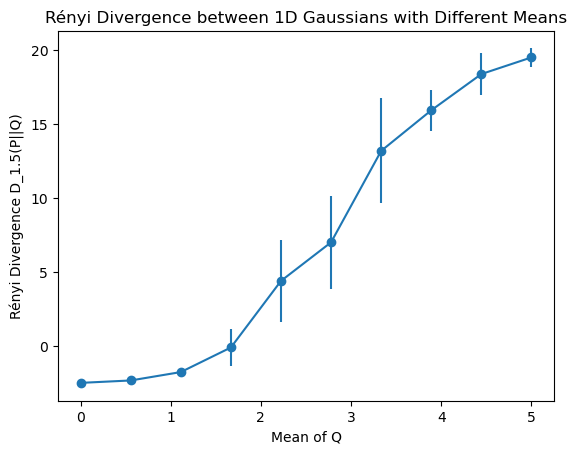

In [5]:
np.random.seed(42)

# plot divergence between two 1D Gaussian distributions with different means
import matplotlib.pyplot as plt
means = np.linspace(0, 5, 10)
n_repeats = 10
results = []
for mean in means:
    divs = []
    for _ in range(n_repeats):
        data_p = np.random.normal(loc=0, scale=1, size=500)
        data_q = np.random.normal(loc=mean, scale=1, size=500)
        D_alpha = renyi_divergence_1d(data_p, data_q, alpha=1.5)
        divs.append(D_alpha)
    results.append((mean, np.mean(divs), np.std(divs)))
results = np.array(results)
plt.errorbar(results[:,0], results[:,1], yerr=results[:,2], fmt='-o')
plt.xlabel('Mean of Q')
plt.ylabel('Rényi Divergence D_1.5(P||Q)')
plt.title('Rényi Divergence between 1D Gaussians with Different Means')